In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

### Research goal: Which features can be used to predict the price of automobiles.

# Import python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sb
%matplotlib inline

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams.update({'font.size': 11})

## Task 1: Data Preparation

In [4]:
# create the variable auto_p and assign it the pathway to Automobile.csv
auto_p ='../notebooks/Automobile.csv'

# Import the csv file as a Pandas data frame that was separated by the hash (i.e. sep='#')
# Column names were imported from the attribute information - American spelling was maintained for consistancy.
auto = pd.read_csv(auto_p, sep='#', decimal='.', header=None,
                   names=['symbolling', 'normalised-losses', 'make', 'fuel-type', 'aspiration',
                          'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                          'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
                          'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
                          'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])

Attribute Information:

Attribute: Attribute Range

1. symboling: ordinal data -  -3, -2, -1, 0, 1, 2, 3.
2. normalised-losses: continuous data - range 65 to 256.
3. make:categorical data - 
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: categorical data - diesel, gas.
5. aspiration: ordinal data - std, turbo.
6. num-of-doors: categorical data - four, two.
7. body-style: categorical data - hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: categorical data - 4wd, fwd, rwd.
9. engine-location: categorical data - front, rear.
10. wheel-base: continuous data - range from 86.6 120.9.
11. length: continuous data - range from 141.1 to 208.1.
12. width: continuous data - range from 60.3 to 72.3.
13. height: continuous data - range from 47.8 to 59.8.
14. curb-weight: continuous data - range from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: ordinal data - eight, five, four, six, three, twelve, two.
17. engine-size: continuous data - range from 61 to 326.
18. fuel-system: categorical data -1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous (ratio) data - range from 7 to 23.
22. horsepower: continuous data - range from 48 to 288.
23. peak-rpm: continuous data - range from 4150 to 6600.
24. city-mpg: continuous data - range from 13 to 49.
25. highway-mpg: continuous data - range from 16 to 54.
26. price: continuous data - range from 5118 to 45400.

(Dua & Graff, 2019)

## 1.2 Checking data types

In [5]:
# Review the Pandas DataFrame object
auto.head()

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
# Call the Pandas info function – verify which variable is a string (object), integer (int64) and float (float64).
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 26 columns):
symbolling           238 non-null int64
normalised-losses    191 non-null float64
make                 238 non-null object
fuel-type            238 non-null object
aspiration           238 non-null object
num-of-doors         236 non-null object
body-style           238 non-null object
drive-wheels         238 non-null object
engine-location      238 non-null object
wheel-base           238 non-null float64
length               238 non-null float64
width                238 non-null float64
height               238 non-null float64
curb-weight          238 non-null int64
engine-type          238 non-null object
num-of-cylinders     238 non-null object
engine-size          238 non-null int64
fuel-system          238 non-null object
bore                 234 non-null float64
stroke               234 non-null float64
compression-ratio    238 non-null float64
horsepower           236 non-

In [7]:
# Call the Pandas describe function to quickly summary statistics (i.e. mean max, quartile standard deviation) for the numeric values– discrete and continuous values.
auto.describe()

,symbolling,normalised-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,238.000000,191.000000,238.00000,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,234.000000,238.000000,236.000000,236.000000,238.000000,238.000000,234.000000
mean,0.642857,116.863874,100.15042,176.094538,66.306303,53.987815,2628.159664,129.575630,3.361282,3.243120,10.458908,107.152542,5140.889831,24.638655,30.016807,13696.081197
std,1.360446,36.171118,6.59659,12.534385,2.230344,2.366944,517.099334,39.453019,0.290631,0.301348,4.384463,38.288297,456.806273,6.357468,6.681397,8060.776465
min,-2.000000,25.000000,86.60000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,0.000000
25%,0.000000,94.000000,95.15000,168.700000,64.400000,52.000000,2224.750000,98.000000,3.150000,3.112500,8.700000,75.250000,4800.000000,19.000000,25.000000,7823.000000
50%,0.000000,104.000000,98.40000,175.500000,66.050000,54.400000,2548.000000,122.000000,3.350000,3.270000,9.000000,102.000000,5200.000000,24.000000,29.000000,11253.500000
75%,2.000000,145.000000,105.57500,188.800000,68.400000,55.500000,3049.000000,145.000000,3.620000,3.400000,9.500000,121.000000,5500.000000,28.750000,34.000000,17890.000000
max,4.000000,256.000000,120.90000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
auto.describe(include='object')

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,238,238,238,236,238,238,238,238,238,238
unique,27,5,5,5,8,6,7,8,10,10
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,32,207,175,142,124,118,232,175,175,116


## 1.3: Typos, 1.4: Extra-whitespaces and 1.5: Upper/Lower-case

In [9]:
# Step 1: Pandas value counts function – determine how many variables and their counts exist in the 'make' column.
# Step 2: Concatenate a colon on either end of the variable string to determine whitespaces.
# Step 3: Pandas replace function - Create a dictionary to replace all typos with the correct variable.
# Step 4: Convert lowercase strings to uppercase strings.
# Step 6: Valitade the changes made

In [10]:
auto.make.value_counts()

toyota           32
volvo            29
mazda            17
nissan           17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           10
volvo             9
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
vol00112ov        3
 volvo            3
jaguar            3
renault           2
Peugot            1
Nissan            1
mercury           1
Name: make, dtype: int64

#### Make

In [11]:
auto.make.value_counts()

toyota           32
volvo            29
mazda            17
nissan           17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
peugot           10
volvo             9
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
alfa-romero       3
chevrolet         3
vol00112ov        3
 volvo            3
jaguar            3
renault           2
Peugot            1
Nissan            1
mercury           1
Name: make, dtype: int64

In [12]:
make_mask = (':' + auto['make']+ ':')
make_mask.value_counts()

:toyota:           32
:volvo:            29
:mazda:            17
:nissan:           17
:honda:            13
:mitsubishi:       13
:subaru:           12
:volkswagen:       12
:peugot:           10
:dodge:             9
:volvo :            9
:bmw:               8
:mercedes-benz:     8
:plymouth:          7
:audi:              7
:saab:              6
:porsche:           5
:isuzu:             4
: volvo :           3
:chevrolet:         3
:alfa-romero:       3
:jaguar:            3
:vol00112ov:        3
:renault:           2
:Peugot:            1
:mercury:           1
:Nissan:            1
Name: make, dtype: int64

(McKinney, 2012, p. 206)

In [13]:
auto['make'].replace({' volvo ': 'volvo', 'volvo ': 'volvo', 'vol00112ov': 'volvo'}, inplace=True)
auto['make'] = auto['make'].str.upper()
auto.make.value_counts()

VOLVO            44
TOYOTA           32
NISSAN           18
MAZDA            17
MITSUBISHI       13
HONDA            13
SUBARU           12
VOLKSWAGEN       12
PEUGOT           11
DODGE             9
BMW               8
MERCEDES-BENZ     8
PLYMOUTH          7
AUDI              7
SAAB              6
PORSCHE           5
ISUZU             4
CHEVROLET         3
ALFA-ROMERO       3
JAGUAR            3
RENAULT           2
MERCURY           1
Name: make, dtype: int64

(McKinney, 2012, pp. 187 - 197)

#### fuel-type

In [14]:
#Pandas value counts function – determine how many variables and their counts exist in the fuel-type column.
auto['fuel-type'].value_counts()

gas       207
diesel     27
Gas         2
Diesel      1
gas         1
Name: fuel-type, dtype: int64

In [15]:
fuel_type_mask = (':' + auto['fuel-type']+ ':')
fuel_type_mask.value_counts()

:gas:       207
:diesel:     27
:Gas:         2
:gas :        1
:Diesel:      1
Name: fuel-type, dtype: int64

(McKinney, 2012, p. 206)

In [16]:
auto['fuel-type'].replace('gas ', 'gas', inplace = True)
auto['fuel-type'] = auto['fuel-type'].str.upper()
auto['fuel-type'].value_counts()

GAS       210
DIESEL     28
Name: fuel-type, dtype: int64

#### aspiration

In [17]:
auto.aspiration.value_counts()

std         175
turbo        57
turrrrbo      3
Std           2
std           1
Name: aspiration, dtype: int64

In [18]:
aspiration_mask = (':' + auto['aspiration']+ ':')
aspiration_mask.value_counts()

:std:         175
:turbo:        57
:turrrrbo:      3
:Std:           2
:std :          1
Name: aspiration, dtype: int64

(McKinney, 2012, p. 206)

In [19]:
auto['aspiration'].replace({'std ': 'std', 'turrrrbo': 'turbo'}, inplace = True)
auto['aspiration'] = auto['aspiration'].str.upper()
auto['aspiration'].value_counts()

STD      178
TURBO     60
Name: aspiration, dtype: int64

#### num-of-doors

In [20]:
auto['num-of-doors'].value_counts()

four     142
two       89
fourR      3
Four       1
four       1
Name: num-of-doors, dtype: int64

In [21]:
num_of_doors_mask =(':' + auto['num-of-doors']+ ':')# and a coulin to the begining and the end of the variable to define the whitespaces
num_of_doors_mask.value_counts()

:four:     142
:two:       89
:fourR:      3
:Four:       1
:four :      1
Name: num-of-doors, dtype: int64

(McKinney, 2012, p. 206)

Possible semantic anomaly - fourR - further investigation required

In [22]:
# verify that the R (I assumed for rear) was not a null value in the ‘drive-wheels’ column."""
auto.loc[auto['num-of-doors'] == 'fourR']

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
211,-1,95.0,VOLVO,GAS,TURBO,fourR,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,0.0
224,-1,95.0,VOLVO,GAS,TURBO,fourR,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,0.0
237,-1,95.0,VOLVO,GAS,TURBO,fourR,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,0.0


(Haqqani, 2019). 

In [23]:
auto['num-of-doors'].replace({'fourR': 'four', 'four ': 'four'}, inplace = True)#yuo could also use the strip function to remove the R
auto['num-of-doors'] = auto['num-of-doors'].str.upper()
auto['num-of-doors'].value_counts()

FOUR    147
TWO      89
Name: num-of-doors, dtype: int64

(McKinney, 2012, pp. 187 - 197)

#### body-style

In [24]:
auto['body-style'].value_counts()

sedan          124
hatchback       70
wagon           26
hardtop          8
convertible      6
sedan            2
Sedan            1
Wagon            1
Name: body-style, dtype: int64

In [25]:
body_style_mask = (':' + auto['body-style']+ ':')# and a coulin to the begining and the end of the variable to define the whitespaces
body_style_mask.value_counts()

:sedan:          124
:hatchback:       70
:wagon:           26
:hardtop:          8
:convertible:      6
:sedan :           2
:Sedan:            1
:Wagon:            1
Name: body-style, dtype: int64

(McKinney, 2012, p. 206)

In [26]:
auto['body-style'].replace('sedan ', 'sedan', inplace = True)#yuo could also use the strip function to remove the R
auto['body-style'] = auto['body-style'].str.upper()
auto['body-style'].value_counts()

SEDAN          127
HATCHBACK       70
WAGON           27
HARDTOP          8
CONVERTIBLE      6
Name: body-style, dtype: int64

(McKinney, 2012, pp. 187 - 197)

#### drive-wheels

In [27]:
auto['drive-wheels'].value_counts()

fwd     118
rwd     108
4wd       9
rwd       1
fwd       1
Fwd       1
Name: drive-wheels, dtype: int64

In [28]:
drive_wheels_mask = (':' + auto['drive-wheels']+ ':')# and a coulin to the begining and the end of the variable to define the whitespaces
drive_wheels_mask.value_counts()

:fwd:     118
:rwd:     108
:4wd:       9
:Fwd:       1
:fwd :      1
:rwd :      1
Name: drive-wheels, dtype: int64

(McKinney, 2012, p. 206)

In [29]:
auto['drive-wheels'].replace({'fwd ': 'fwd', 'rwd ': 'rwd'}, inplace = True)#yuo could also use the strip function to remove the R
auto['drive-wheels'] = auto['drive-wheels'].str.upper()
auto['drive-wheels'].value_counts()

FWD    120
RWD    109
4WD      9
Name: drive-wheels, dtype: int64

(McKinney, 2012, pp. 187 - 197)

#### engine-location

In [30]:
auto['engine-location'].value_counts()

front     232
Front       1
REAR        1
rear        1
front       1
FRONT       1
Rear        1
Name: engine-location, dtype: int64

In [31]:
engine_location_mask = (':' + auto['engine-location']+ ':')# and a coulin to the begining and the end of the variable to define the whitespaces
engine_location_mask.value_counts()

:front:     232
:Rear:        1
:rear:        1
:Front:       1
:FRONT:       1
:REAR:        1
:front :      1
Name: engine-location, dtype: int64

(McKinney, 2012, p. 206)

In [32]:
auto['engine-location'].replace('front ', 'front', inplace = True)
auto['engine-location'] = auto['engine-location'].str.upper()
auto['engine-location'].value_counts()

FRONT    235
REAR       3
Name: engine-location, dtype: int64

(McKinney, 2012, pp. 187 - 197)

#### engine-type

In [33]:
auto['engine-type'].value_counts()

ohc      175
ohcv      18
ohcf      15
l         12
dohc      12
rotor      4
Ohc        1
dohcv      1
Name: engine-type, dtype: int64

In [34]:
engine_type_mask = (':' + auto['engine-type']+ ':')# and a coulin to the begining and the end of the variable to define the whitespaces
engine_type_mask.value_counts()

:ohc:      175
:ohcv:      18
:ohcf:      15
:l:         12
:dohc:      12
:rotor:      4
:dohcv:      1
:Ohc:        1
Name: engine-type, dtype: int64

(McKinney, 2012, p. 206)

In [35]:
auto['engine-type'] = auto['engine-type'].str.upper()
auto['engine-type'].value_counts()

OHC      176
OHCV      18
OHCF      15
L         12
DOHC      12
ROTOR      4
DOHCV      1
Name: engine-type, dtype: int64

(McKinney, 2012, p. 197)

#### num-of-cylinders

In [36]:
auto['num-of-cylinders'].value_counts()

four      175
six        37
five       10
eight       5
two         4
Four        2
 four       2
five        1
three       1
twelve      1
Name: num-of-cylinders, dtype: int64

In [37]:
num_of_cylinders_mask = (':' + auto['num-of-cylinders']+ ':')# and a coulin to the begining and the end of the variable to define the whitespaces
num_of_cylinders_mask.value_counts()

:four:      175
:six:        37
:five:       10
:eight:       5
:two:         4
:Four:        2
: four:       2
:twelve:      1
:five :       1
:three:       1
Name: num-of-cylinders, dtype: int64

(McKinney, 2012, p. 206)

In [38]:
auto['num-of-cylinders'].replace({' four': 'four', 'five ': 'five'}, inplace = True)
auto['num-of-cylinders'] = auto['num-of-cylinders'].str.replace('five ', 'five')
auto['num-of-cylinders'] = auto['num-of-cylinders'].str.upper()
auto['num-of-cylinders'].value_counts()

FOUR      179
SIX        37
FIVE       11
EIGHT       5
TWO         4
THREE       1
TWELVE      1
Name: num-of-cylinders, dtype: int64

(McKinney, 2012, pp. 187 - 197)

#### fuel-system

In [39]:
auto['fuel-system'].value_counts()

mpfi     116
2bbl      66
idi       28
1bbl      11
spdi       9
4bbl       3
mpfi       2
spfi       1
Mpfi       1
mfi        1
Name: fuel-system, dtype: int64

In [40]:
fuel_system_mask =(':' + auto['fuel-system']+ ':')# and a coulin to the begining and the end of the variable to define the whitespaces
fuel_system_mask.value_counts()

:mpfi:     116
:2bbl:      66
:idi:       28
:1bbl:      11
:spdi:       9
:4bbl:       3
:mpfi :      2
:Mpfi:       1
:mfi:        1
:spfi:       1
Name: fuel-system, dtype: int64

(McKinney, 2012, p. 206)

In [41]:
auto['fuel-system'].replace('mpfi ', 'mpfi', inplace = True) # check fuel systems mfi and spfi
auto['fuel-system'] = auto['fuel-system'].str.upper()
auto['fuel-system'].value_counts()

MPFI    119
2BBL     66
IDI      28
1BBL     11
SPDI      9
4BBL      3
SPFI      1
MFI       1
Name: fuel-system, dtype: int64

(McKinney, 2012, pp. 187 - 197)

## 1.6: Sanity Checks

In [42]:
# review numerical relationships
auto.describe()

,symbolling,normalised-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,238.000000,191.000000,238.00000,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,234.000000,238.000000,236.000000,236.000000,238.000000,238.000000,234.000000
mean,0.642857,116.863874,100.15042,176.094538,66.306303,53.987815,2628.159664,129.575630,3.361282,3.243120,10.458908,107.152542,5140.889831,24.638655,30.016807,13696.081197
std,1.360446,36.171118,6.59659,12.534385,2.230344,2.366944,517.099334,39.453019,0.290631,0.301348,4.384463,38.288297,456.806273,6.357468,6.681397,8060.776465
min,-2.000000,25.000000,86.60000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,0.000000
25%,0.000000,94.000000,95.15000,168.700000,64.400000,52.000000,2224.750000,98.000000,3.150000,3.112500,8.700000,75.250000,4800.000000,19.000000,25.000000,7823.000000
50%,0.000000,104.000000,98.40000,175.500000,66.050000,54.400000,2548.000000,122.000000,3.350000,3.270000,9.000000,102.000000,5200.000000,24.000000,29.000000,11253.500000
75%,2.000000,145.000000,105.57500,188.800000,68.400000,55.500000,3049.000000,145.000000,3.620000,3.400000,9.500000,121.000000,5500.000000,28.750000,34.000000,17890.000000
max,4.000000,256.000000,120.90000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


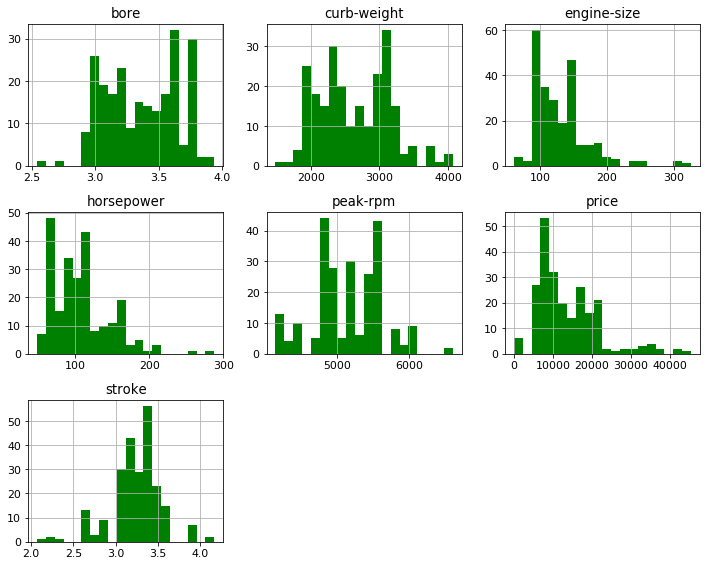

In [43]:
# review the distribution of variable that have missing values
auto[['bore', 'stroke','engine-size','peak-rpm',
      'curb-weight','horsepower','price']].hist(figsize=(10,8),bins=20,color='g')
plt.tight_layout()
plt.show()

#### Symbolling

In [44]:
auto[auto.symbolling==4] #impossibe value (range 3 to -3)

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
205,4,25.0,VOLVO,GAS,STD,FOUR,SEDAN,RWD,FRONT,109.1,...,141,MPFI,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
218,4,25.0,VOLVO,GAS,STD,FOUR,SEDAN,RWD,FRONT,109.1,...,141,MPFI,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
231,4,25.0,VOLVO,GAS,STD,FOUR,SEDAN,RWD,FRONT,109.1,...,141,MPFI,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C494710>,
      dtype=object)

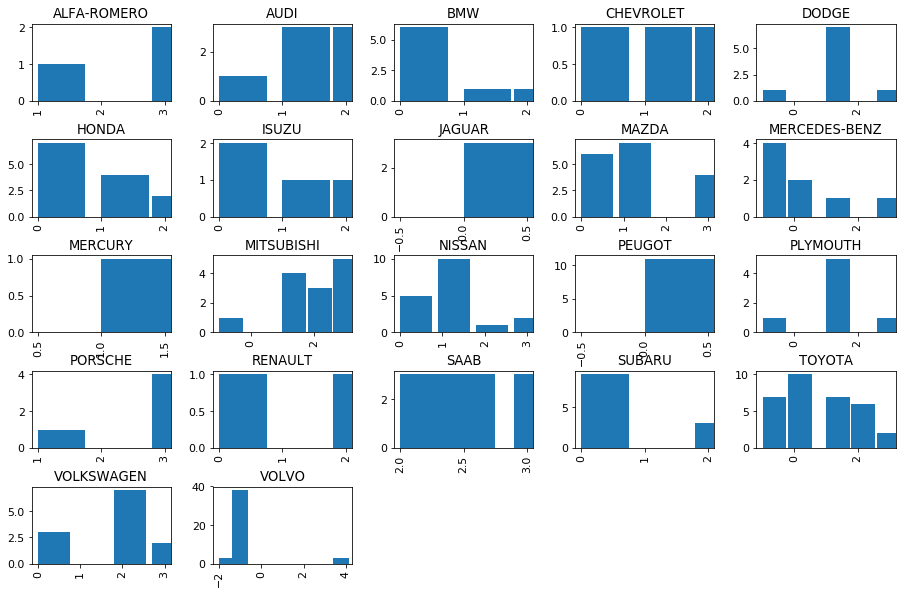

In [45]:
# review the distribution of the symbolling variable 
auto.hist(by='make', column='symbolling', figsize =(15,10), width =0.75)

In [46]:
# first quartile - any corrolation? - no corrolation identified
auto[(auto['normalised-losses'] <= 94)]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
20,0,81.0,CHEVROLET,GAS,STD,FOUR,SEDAN,FWD,FRONT,94.5,...,90,2BBL,3.03,3.11,9.6,70.0,5400.0,38,43,6575.0
36,0,78.0,HONDA,GAS,STD,FOUR,WAGON,FWD,FRONT,96.5,...,92,1BBL,2.92,3.41,9.2,76.0,6000.0,30,34,7295.0
39,0,85.0,HONDA,GAS,STD,FOUR,SEDAN,FWD,FRONT,96.5,...,110,1BBL,3.15,3.58,9.0,86.0,5800.0,27,33,8845.0
40,0,85.0,HONDA,GAS,STD,FOUR,SEDAN,FWD,FRONT,96.5,...,110,1BBL,3.15,3.58,9.0,86.0,5800.0,27,33,10295.0
41,0,85.0,HONDA,GAS,STD,FOUR,SEDAN,FWD,FRONT,96.5,...,110,MPFI,3.15,3.58,9.0,101.0,5800.0,24,28,12945.0
67,-1,93.0,MERCEDES-BENZ,DIESEL,TURBO,FOUR,SEDAN,RWD,FRONT,110.0,...,183,IDI,3.58,3.64,21.5,123.0,4350.0,22,25,25552.0
68,-1,93.0,MERCEDES-BENZ,DIESEL,TURBO,FOUR,WAGON,RWD,FRONT,110.0,...,183,IDI,3.58,3.64,21.5,123.0,4350.0,22,25,28248.0
69,0,93.0,MERCEDES-BENZ,DIESEL,TURBO,TWO,HARDTOP,RWD,FRONT,106.7,...,183,IDI,3.58,3.64,21.5,123.0,4350.0,22,25,28176.0
70,-1,93.0,MERCEDES-BENZ,DIESEL,TURBO,FOUR,SEDAN,RWD,FRONT,115.6,...,183,IDI,3.58,3.64,21.5,123.0,4350.0,22,25,31600.0
123,-1,74.0,PLYMOUTH,GAS,STD,FOUR,WAGON,FWD,FRONT,103.3,...,122,2BBL,3.35,3.46,8.5,88.0,5000.0,24,30,8921.0


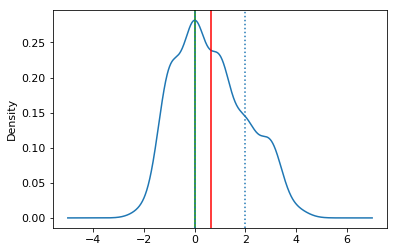

In [47]:
# review the distribution and statistics of the variable
auto['symbolling'].plot(kind='density') # distribution is slightly skewed median or mode could be used
plt.axvline(auto.symbolling.mean(),c ='r')
plt.axvline(auto.symbolling.median(), c ='g')
plt.axvline(auto.symbolling.quantile(0.25), linestyle =':')
plt.axvline(auto.symbolling.quantile(0.75),linestyle =':')

(Vallisneri, 2018)

Normal test: Combines skew and kurtosis measurement and allows for the management of NaN, a p score greater than 0.1 depicts normal distribution (Patino, 2016)

In [48]:
# Calculate if the variable has a normal distribution
ptest = auto[auto.make=='VOLVO']['symbolling'] # testing for normal distribution
ptest = stats.normaltest(ptest, nan_policy='omit')

if ptest[1]>0.1:
    print 'the distribution is normal -', ptest[1]
else:
    print'the distribution is not normal -', ptest[1]

the distribution is not normal - 4.18656607882295e-12


(Patino, 2016)

In [49]:
# review the stats associated with subgroups
auto[(auto.make=='VOLVO') & (auto.symbolling<4) & (auto['body-style']=='SEDAN')].symbolling.describe()

count    36.000000
mean     -1.083333
std       0.280306
min      -2.000000
25%      -1.000000
50%      -1.000000
75%      -1.000000
max      -1.000000
Name: symbolling, dtype: float64

In [50]:
# review the stats associated with subgroups

volvo_median_value = auto[auto.make=='VOLVO'].symbolling.describe()
volvo_median_value

count    44.000000
mean     -0.727273
std       1.318273
min      -2.000000
25%      -1.000000
50%      -1.000000
75%      -1.000000
max       4.000000
Name: symbolling, dtype: float64

In [51]:
# replace the 'make' subgroup variable based on the median, due to a non-normal distribution
#other subgroups had less than 30 observations
auto['symbolling'].replace(4, volvo_median_value, inplace = True)

#### Price

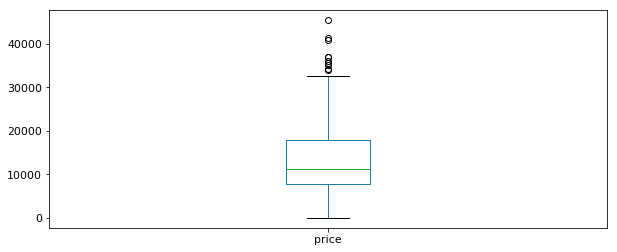

In [52]:
# visualise that the null and 0 values have been removed from the variable price.
auto[['price']].plot(kind="box", figsize=(10, 4))

In [53]:
# Looking for syntactic or semantic anomalies
auto[(auto.price >40000) | (auto.price <5000)]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
16,0,NaN,BMW,GAS,STD,TWO,SEDAN,RWD,FRONT,103.5,...,209,MPFI,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
73,0,NaN,MERCEDES-BENZ,GAS,STD,FOUR,SEDAN,RWD,FRONT,120.9,...,308,MPFI,3.80,3.35,8.0,184.0,4500.0,14,16,40960.0
74,1,NaN,MERCEDES-BENZ,GAS,STD,TWO,HARDTOP,RWD,FRONT,112.0,...,304,MPFI,3.80,3.35,8.0,184.0,4500.0,14,16,45400.0
210,-1,95.0,VOLVO,DIESEL,TURBO,FOUR,SEDAN,RWD,FRONT,109.1,...,145,IDI,3.01,3.40,23.0,106.0,4800.0,26,27,0.0
211,-1,95.0,VOLVO,GAS,TURBO,FOUR,SEDAN,RWD,FRONT,109.1,...,141,MPFI,3.78,3.15,9.5,114.0,5400.0,19,25,0.0
223,-1,95.0,VOLVO,DIESEL,TURBO,FOUR,SEDAN,RWD,FRONT,109.1,...,145,IDI,3.01,3.40,23.0,106.0,4800.0,26,27,0.0
224,-1,95.0,VOLVO,GAS,TURBO,FOUR,SEDAN,RWD,FRONT,109.1,...,141,MPFI,3.78,3.15,9.5,114.0,5400.0,19,25,0.0
236,-1,95.0,VOLVO,DIESEL,TURBO,FOUR,SEDAN,RWD,FRONT,109.1,...,145,IDI,3.01,3.40,23.0,106.0,4800.0,26,27,0.0
237,-1,95.0,VOLVO,GAS,TURBO,FOUR,SEDAN,RWD,FRONT,109.1,...,141,MPFI,3.78,3.15,9.5,114.0,5400.0,19,25,0.0


Price is the target value, as such outliers or impossible value should be removed not interpolated, to interpolate this variable may lead to correlation. 

In [54]:
# Price is the Target variable, convert to NaN values so that they can be dropped.
auto.price.replace(0.0, np.nan, inplace = True)
auto.price.value_counts()

19045.0    6
21485.0    6
16845.0    6
22625.0    6
22470.0    6
18950.0    3
5572.0     2
13499.0    2
7898.0     2
7609.0     2
7295.0     2
6229.0     2
8495.0     2
8845.0     2
18150.0    2
6692.0     2
9279.0     2
16500.0    2
8921.0     2
7957.0     2
7775.0     2
5389.0     1
22018.0    1
9549.0     1
13415.0    1
9980.0     1
6575.0     1
7975.0     1
7499.0     1
7689.0     1
          ..
11248.0    1
18344.0    1
6488.0     1
13200.0    1
8358.0     1
10198.0    1
11245.0    1
7895.0     1
8249.0     1
18420.0    1
7053.0     1
16503.0    1
9989.0     1
12170.0    1
6855.0     1
6785.0     1
14399.0    1
7395.0     1
11199.0    1
12940.0    1
17199.0    1
7099.0     1
6338.0     1
9295.0     1
15580.0    1
6377.0     1
30760.0    1
16925.0    1
15998.0    1
18920.0    1
Name: price, Length: 186, dtype: int64

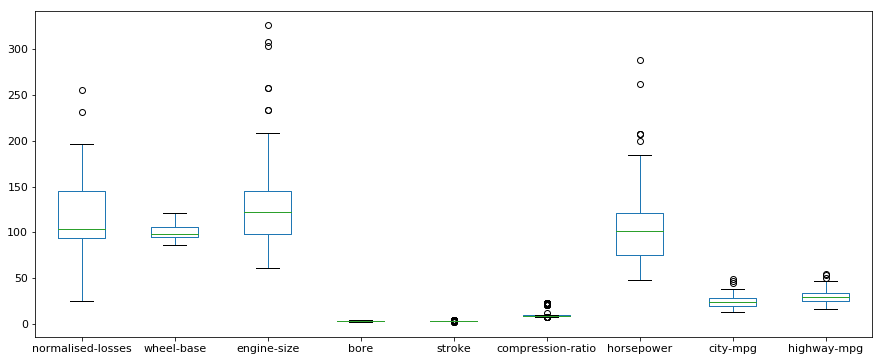

In [55]:
# Looking for syntactic or semantic anomalies
auto[['normalised-losses', 'wheel-base', 'engine-size','bore', 'stroke', 
      'compression-ratio', 'horsepower', 'city-mpg', 'highway-mpg']].plot(kind="box", figsize=(15, 6))

Possible relationships can be observed between engine size and horsepower and bore and stroke, and city-mpg and highyway.mpg.

In [56]:
# Looking for syntactic or semantic anomalies
auto[auto['normalised-losses']>200]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
106,1,231.0,NISSAN,GAS,STD,TWO,HATCHBACK,RWD,FRONT,99.2,...,181,MPFI,3.43,3.27,9.0,160.0,5200.0,19,25,18399.0
190,3,256.0,VOLKSWAGEN,GAS,STD,TWO,HATCHBACK,FWD,FRONT,94.5,...,109,MPFI,3.19,3.40,8.5,90.0,5500.0,24,29,9980.0


#### Review related columns to look for semantic anomolies

In [57]:
# Looking for syntactic or semantic anomalies
auto['num-of-doors'].groupby(auto['body-style']).describe()

,count,unique,top,freq
body-style,,,,
CONVERTIBLE,6,1,TWO,6
HARDTOP,8,1,TWO,8
HATCHBACK,70,2,TWO,60
SEDAN,125,2,FOUR,110
WAGON,27,1,FOUR,27


In [58]:
# Looking for syntactic or semantic anomalies
pd.crosstab(auto['num-of-doors'], auto['body-style'])

body-style,CONVERTIBLE,HARDTOP,HATCHBACK,SEDAN,WAGON
num-of-doors,,,,,
FOUR,0,0,10,110,27
TWO,6,8,60,15,0


In [59]:
# Looking for syntactic or semantic anomalies
auto['wheel-base'].groupby(auto['engine-location']).describe()

,count,mean,std,min,25%,50%,75%,max
engine-location,,,,,,,,
FRONT,235.0,100.286383,6.526873,86.6,95.3,98.4,105.8,120.9
REAR,3.0,89.500000,0.000000,89.5,89.5,89.5,89.5,89.5


In [60]:
# Looking for syntactic or semantic anomalies
pd.crosstab(auto['engine-location'], auto['drive-wheels']) # Cars with the engines in the back always have a rear-wheel drive.

drive-wheels,4WD,FWD,RWD
engine-location,,,
FRONT,9,120,106
REAR,0,0,3


In [61]:
# Looking for syntactic or semantic anomalies
pd.crosstab(auto['body-style'], auto['make'])

make,ALFA-ROMERO,AUDI,BMW,CHEVROLET,DODGE,HONDA,ISUZU,JAGUAR,MAZDA,MERCEDES-BENZ,...,NISSAN,PEUGOT,PLYMOUTH,PORSCHE,RENAULT,SAAB,SUBARU,TOYOTA,VOLKSWAGEN,VOLVO
body-style,,,,,,,,,,,,,,,,,,,,,
CONVERTIBLE,2,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
HARDTOP,0,0,0,0,0,0,0,0,0,2,...,1,0,0,2,0,0,0,3,0,0
HATCHBACK,1,1,0,2,5,7,1,0,10,0,...,5,0,4,2,1,3,3,14,1,0
SEDAN,0,5,8,1,3,5,3,3,7,4,...,9,7,2,0,0,3,5,10,9,39
WAGON,0,1,0,0,1,1,0,0,0,1,...,3,4,1,0,1,0,4,4,1,5


## Null Values

#### Normalised-losses

In [62]:
# filter out NaN values
auto[auto['normalised-losses']!=auto['normalised-losses']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,ALFA-ROMERO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,130,MPFI,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,ALFA-ROMERO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,130,MPFI,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,ALFA-ROMERO,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,...,152,MPFI,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
5,2,NaN,AUDI,GAS,STD,TWO,SEDAN,FWD,FRONT,99.8,...,136,MPFI,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
7,1,NaN,AUDI,GAS,STD,FOUR,WAGON,FWD,FRONT,105.8,...,136,MPFI,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
9,0,NaN,AUDI,GAS,TURBO,TWO,HATCHBACK,4WD,FRONT,99.5,...,131,MPFI,3.13,3.40,7.0,160.0,5500.0,16,22,NaN
14,1,NaN,BMW,GAS,STD,FOUR,SEDAN,RWD,FRONT,103.5,...,164,MPFI,3.31,3.19,9.0,121.0,4250.0,20,25,24565.0
15,0,NaN,BMW,GAS,STD,FOUR,SEDAN,RWD,FRONT,103.5,...,209,MPFI,3.62,3.39,8.0,182.0,5400.0,16,22,30760.0
16,0,NaN,BMW,GAS,STD,TWO,SEDAN,RWD,FRONT,103.5,...,209,MPFI,3.62,3.39,8.0,182.0,5400.0,16,22,41315.0
17,0,NaN,BMW,GAS,STD,FOUR,SEDAN,RWD,FRONT,110.0,...,209,MPFI,3.62,3.39,8.0,182.0,5400.0,15,20,36880.0


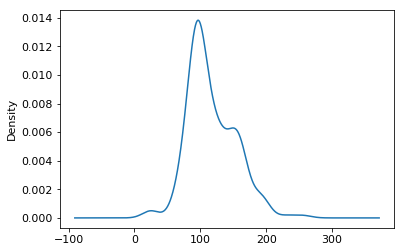

In [63]:
auto['normalised-losses'].plot(kind='density')

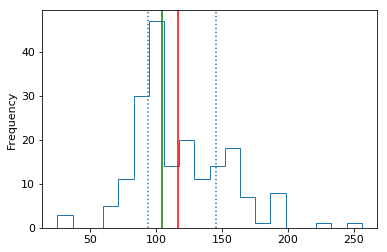

In [64]:
auto['normalised-losses'].plot(kind='hist', histtype='step', bins=20)

plt.axvline(auto['normalised-losses'].mean(),c ='r')
plt.axvline(auto['normalised-losses'].median(), c ='g')
plt.axvline(auto['normalised-losses'].quantile(0.25), linestyle =':')
plt.axvline(auto['normalised-losses'].quantile(0.75),linestyle =':')

(Vallisneri, 2018)

In [65]:
ptest_norm_loss = auto['normalised-losses']

In [66]:
# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
ptest = stats.normaltest(ptest_norm_loss, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'
  
if ptest[1]>0.1:
    print 'the distribution is normal,  p-score is:-', ptest[1]
else:
    print'the distribution is not normal, p-score is: -', ptest[1]

the distribution is not normal, p-score is: - 0.00016477622935015377


(Patino, 2016)

In [67]:
# replace the variable based on the median, due to a non-normal distribution
auto['normalised-losses'].fillna(auto['normalised-losses'].median(), inplace=True)

#### Bore

In [68]:
auto[auto['bore']!=auto['bore']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,MAZDA,GAS,STD,TWO,HATCHBACK,RWD,FRONT,95.3,...,70,4BBL,NaN,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,MAZDA,GAS,STD,TWO,HATCHBACK,RWD,FRONT,95.3,...,70,4BBL,NaN,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,MAZDA,GAS,STD,TWO,HATCHBACK,RWD,FRONT,95.3,...,70,4BBL,NaN,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,MAZDA,GAS,STD,TWO,HATCHBACK,RWD,FRONT,95.3,...,80,MPFI,NaN,NaN,9.4,135.0,6000.0,16,23,15645.0


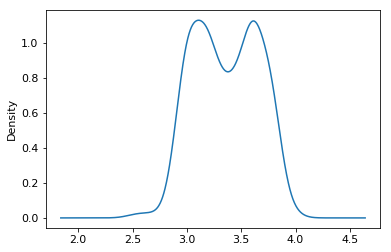

In [69]:
auto['bore'].plot(kind='density')

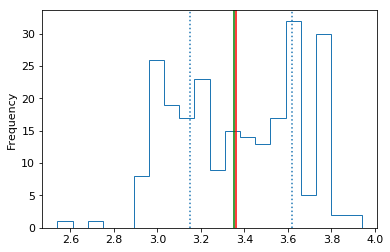

In [70]:
auto['bore'].plot(kind='hist', histtype='step', bins=20)

plt.axvline(auto['bore'].mean(),c ='r')
plt.axvline(auto['bore'].median(), c ='g')
plt.axvline(auto['bore'].quantile(0.25), linestyle =':')
plt.axvline(auto['bore'].quantile(0.75),linestyle =':')

(Vallisneri, 2018)

In [71]:
df = auto[auto['make'] == 'MAZDA']
df.shape # not enough observations to predict (should be greater than 30)

(17, 26)

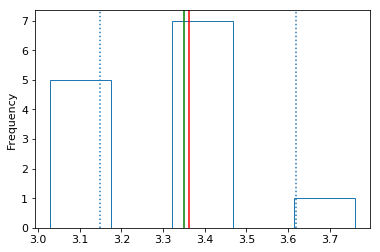

In [72]:
df['bore'].plot(kind='hist', histtype='step', bins=5)

plt.axvline(auto['bore'].mean(),c ='r')
plt.axvline(auto['bore'].median(), c ='g')
plt.axvline(auto['bore'].quantile(0.25), linestyle =':')
plt.axvline(auto['bore'].quantile(0.75),linestyle =':')

(Vallisneri, 2018)

In [73]:
auto.bore.describe()

count    234.000000
mean       3.361282
std        0.290631
min        2.540000
25%        3.150000
50%        3.350000
75%        3.620000
max        3.940000
Name: bore, dtype: float64

In [74]:
auto[auto.make=='MAZDA'].bore.describe()

count    13.000000
mean      3.286923
std       0.226362
min       3.030000
25%       3.030000
50%       3.390000
75%       3.390000
max       3.760000
Name: bore, dtype: float64

In [75]:
# replace the variable based on the median, due to a non-normal distribution
auto['bore'].fillna(auto['bore'].median(), inplace=True)

#### Stroke

In [76]:
auto[auto['stroke']!=auto['stroke']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
55,3,150.0,MAZDA,GAS,STD,TWO,HATCHBACK,RWD,FRONT,95.3,...,70,4BBL,3.35,NaN,9.4,101.0,6000.0,17,23,10945.0
56,3,150.0,MAZDA,GAS,STD,TWO,HATCHBACK,RWD,FRONT,95.3,...,70,4BBL,3.35,NaN,9.4,101.0,6000.0,17,23,11845.0
57,3,150.0,MAZDA,GAS,STD,TWO,HATCHBACK,RWD,FRONT,95.3,...,70,4BBL,3.35,NaN,9.4,101.0,6000.0,17,23,13645.0
58,3,150.0,MAZDA,GAS,STD,TWO,HATCHBACK,RWD,FRONT,95.3,...,80,MPFI,3.35,NaN,9.4,135.0,6000.0,16,23,15645.0


In [77]:
auto.stroke.describe()

count    234.000000
mean       3.243120
std        0.301348
min        2.070000
25%        3.112500
50%        3.270000
75%        3.400000
max        4.170000
Name: stroke, dtype: float64

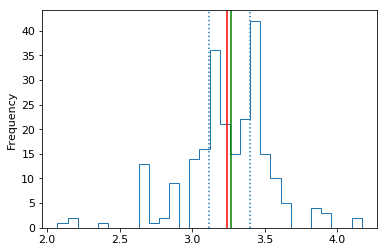

In [78]:
auto['stroke'].plot(kind='hist', histtype='step', bins=30)

plt.axvline(auto['stroke'].mean(),c ='r')
plt.axvline(auto['stroke'].median(), c ='g')
plt.axvline(auto['stroke'].quantile(0.25), linestyle =':')
plt.axvline(auto['stroke'].quantile(0.75),linestyle =':')

(Vallisneri, 2018)

In [79]:
ptest_stroke = auto['stroke']

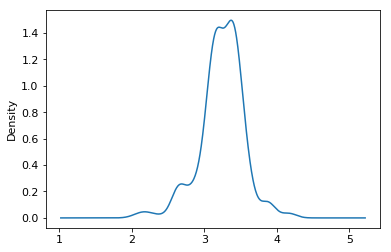

In [80]:
ptest_stroke.plot(kind='density')

In [81]:
# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
ptest = stats.normaltest(ptest_stroke, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'
  
if ptest[1]>0.1:
    print 'the distribution is normal,  p-score is:-', ptest[1]
else:
    print'the distribution is not normal, p-score is: -', ptest[1]

the distribution is not normal, p-score is: - 6.395573649696496e-07


(Patino, 2016)

In [82]:
# replace the variable based on the median, due to a non-normal distribution
auto['stroke'].fillna(auto['stroke'].median(), inplace=True)

#### peak - rpm

In [83]:
auto[auto['peak-rpm']!=auto['peak-rpm']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,104.0,RENAULT,GAS,STD,FOUR,WAGON,FWD,FRONT,96.1,...,132,MPFI,3.46,3.9,8.7,NaN,NaN,23,31,9295.0
131,2,104.0,RENAULT,GAS,STD,TWO,HATCHBACK,FWD,FRONT,96.1,...,132,MPFI,3.46,3.9,8.7,NaN,NaN,23,31,9895.0


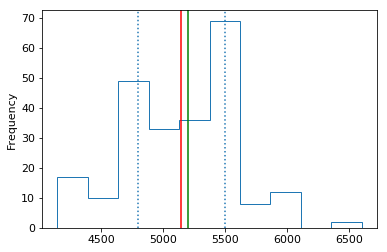

In [84]:
auto['peak-rpm'].plot(kind='hist', histtype='step', bins=10)

plt.axvline(auto['peak-rpm'].mean(),c ='r')
plt.axvline(auto['peak-rpm'].median(), c ='g')
plt.axvline(auto['peak-rpm'].quantile(0.25), linestyle =':')
plt.axvline(auto['peak-rpm'].quantile(0.75),linestyle =':')

(Vallisneri, 2018)

In [85]:
ptest_peak_rpm = auto['peak-rpm']

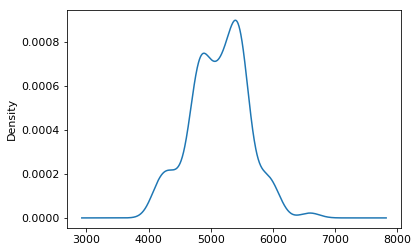

In [86]:
ptest_peak_rpm.plot(kind='density')

In [87]:
# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
ptest = stats.normaltest(ptest_peak_rpm, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'
  
if ptest[1]>0.1:
    print 'the distribution is normal,  p-score is:-', ptest[1]
else:
    print'the distribution is not normal, p-score is: -', ptest[1]

the distribution is normal,  p-score is:- 0.7529553563466959


(Patino, 2016)

In [88]:
# replace the variable based on the mean, due to a normal distribution
auto['peak-rpm'].fillna(auto['peak-rpm'].mean(), inplace=True)

#### Horsepower

In [89]:
auto[auto['horsepower']!=auto['horsepower']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,104.0,RENAULT,GAS,STD,FOUR,WAGON,FWD,FRONT,96.1,...,132,MPFI,3.46,3.9,8.7,NaN,5140.889831,23,31,9295.0
131,2,104.0,RENAULT,GAS,STD,TWO,HATCHBACK,FWD,FRONT,96.1,...,132,MPFI,3.46,3.9,8.7,NaN,5140.889831,23,31,9895.0


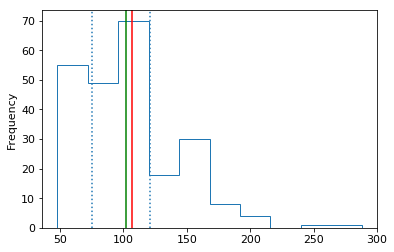

In [90]:
auto['horsepower'].plot(kind='hist', histtype='step', bins=10)

plt.axvline(auto['horsepower'].mean(),c ='r')
plt.axvline(auto['horsepower'].median(), c ='g')
plt.axvline(auto['horsepower'].quantile(0.25), linestyle =':')
plt.axvline(auto['horsepower'].quantile(0.75),linestyle =':')

(Vallisneri, 2018)

In [91]:
ptest_horsepower = auto['horsepower']

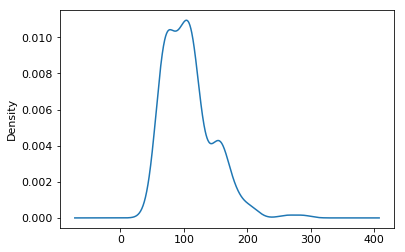

In [92]:
ptest_horsepower.plot(kind='density')

In [93]:
# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
ptest = stats.normaltest(ptest_horsepower, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'
  
if ptest[1]>0.1:
    print 'the distribution is normal,  p-score is:-', ptest[1]
else:
    print'the distribution is not normal, p-score is: -', ptest[1]

the distribution is not normal, p-score is: - 6.838982989503943e-13


(Patino, 2016)

In [94]:
# replace the variable based on the median, due to a non-normal distribution
auto['horsepower'].fillna(auto['horsepower'].median(), inplace=True)

In [95]:
auto[auto['horsepower']!=auto['horsepower']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


#### Highway-mpg

In [96]:
auto[auto['highway-mpg']!=auto['highway-mpg']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


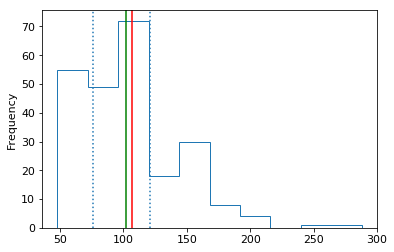

In [97]:
auto['horsepower'].plot(kind='hist', histtype='step', bins=10)

plt.axvline(auto['horsepower'].mean(),c ='r')
plt.axvline(auto['horsepower'].median(), c ='g')
plt.axvline(auto['horsepower'].quantile(0.25), linestyle =':')
plt.axvline(auto['horsepower'].quantile(0.75),linestyle =':')

(Vallisneri, 2018)

In [98]:
ptest_horsepower = auto['horsepower']

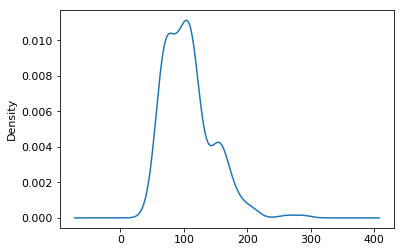

In [99]:
ptest_horsepower.plot(kind='density')

In [100]:
# Normal test: Combines skew and kurtosis measurement. Allows management of NaN
ptest = stats.normaltest(ptest_horsepower, nan_policy='omit') #nan_policy opts: 'propagate', 'raise'
  
if ptest[1]>0.1:
    print 'the distribution is normal,  p-score is:-', ptest[1]
else:
    print'the distribution is not normal, p-score is: -', ptest[1]

the distribution is not normal, p-score is: - 3.801393201477969e-13


(Patino, 2016)

In [101]:
# replace NaN values with the median due to the skewed and non-normal distribution.
auto['horsepower'].fillna(auto['horsepower'].median(), inplace=True)

In [102]:
# filter out NaN values
auto[auto['horsepower']!=auto['horsepower']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


#### Number of doors

In [103]:
# filter out NaN values
auto[auto['num-of-doors']!=auto['num-of-doors']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
27,1,148.0,DODGE,GAS,TURBO,NaN,SEDAN,FWD,FRONT,93.7,...,98,MPFI,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,104.0,MAZDA,DIESEL,STD,NaN,SEDAN,FWD,FRONT,98.8,...,122,IDI,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [104]:
# subgroup and review the mode based on make and body style
auto[(auto.make=='MAZDA') & (auto['body-style'] =='SEDAN')]['num-of-doors'].mode()

0    FOUR
dtype: object

In [105]:
# subgroup and review the mode based on make and body style
auto[(auto.make=='DODGE') & (auto['body-style'] =='SEDAN')]['num-of-doors'].mode()

0    FOUR
dtype: object

In [106]:
# subgroup and review the mode based on make and body style
num_doors_mode = auto[auto['body-style'] =='SEDAN']['num-of-doors'].mode()
num_doors_mode

0    FOUR
dtype: object

In [107]:
# The mode variable was determined to be appropriate due to the non normal distribution of the nominal variable.
auto['num-of-doors'].replace(np.nan, str('FOUR'), inplace = True)

In [108]:
auto[auto['num-of-doors']!=auto['num-of-doors']]

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## Drop duplicates

In [109]:
# list all duplicates
auto.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
208    False
209    False
210    False
211    False
212     True
213     True
214     True
215     True
216     True
217     True
218     True
219     True
220     True
221     True
222     True
223     True
224     True
225     True
226     True
227     True
228     True
229     True
230     True
231     True
232     True
233     True
234     True
235     True
236     True
237     True
Length: 238, dtype: bool

In [110]:
# Duplicates were dropped because they had the risk of skewing or adding bias to the analysis.
auto.drop_duplicates()

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,104.0,ALFA-ROMERO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,130,MPFI,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,104.0,ALFA-ROMERO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,130,MPFI,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,104.0,ALFA-ROMERO,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,...,152,MPFI,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,AUDI,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,...,109,MPFI,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,AUDI,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,...,136,MPFI,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,104.0,AUDI,GAS,STD,TWO,SEDAN,FWD,FRONT,99.8,...,136,MPFI,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,AUDI,GAS,STD,FOUR,SEDAN,FWD,FRONT,105.8,...,136,MPFI,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,104.0,AUDI,GAS,STD,FOUR,WAGON,FWD,FRONT,105.8,...,136,MPFI,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,AUDI,GAS,TURBO,FOUR,SEDAN,FWD,FRONT,105.8,...,131,MPFI,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
9,0,104.0,AUDI,GAS,TURBO,TWO,HATCHBACK,4WD,FRONT,99.5,...,131,MPFI,3.13,3.40,7.00,160.0,5500.0,16,22,NaN


In [111]:
# drop rows that have a price (target variable) of $0
auto_clean_df = auto.dropna(axis=0, subset=['price'])

In [112]:
auto_clean_df

,symbolling,normalised-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,104.0,ALFA-ROMERO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,130,MPFI,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,3,104.0,ALFA-ROMERO,GAS,STD,TWO,CONVERTIBLE,RWD,FRONT,88.6,...,130,MPFI,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,1,104.0,ALFA-ROMERO,GAS,STD,TWO,HATCHBACK,RWD,FRONT,94.5,...,152,MPFI,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,2,164.0,AUDI,GAS,STD,FOUR,SEDAN,FWD,FRONT,99.8,...,109,MPFI,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,2,164.0,AUDI,GAS,STD,FOUR,SEDAN,4WD,FRONT,99.4,...,136,MPFI,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,2,104.0,AUDI,GAS,STD,TWO,SEDAN,FWD,FRONT,99.8,...,136,MPFI,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,1,158.0,AUDI,GAS,STD,FOUR,SEDAN,FWD,FRONT,105.8,...,136,MPFI,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,1,104.0,AUDI,GAS,STD,FOUR,WAGON,FWD,FRONT,105.8,...,136,MPFI,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,1,158.0,AUDI,GAS,TURBO,FOUR,SEDAN,FWD,FRONT,105.8,...,131,MPFI,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
10,2,192.0,BMW,GAS,STD,TWO,SEDAN,RWD,FRONT,101.2,...,108,MPFI,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0


In [113]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line




#### Variant Analysis

In [114]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values


#Code goes after this line



In [115]:
# set the design parameters for the following figures.
plt.rcParams['figure.figsize']=(6,4)
plt.rcParams.update({'font.size': 11})
sb.set_style('darkgrid')


(Pierson, 2017a)

#### Nominal

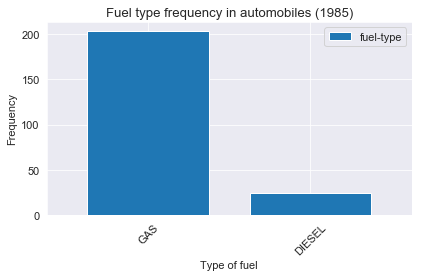

In [116]:
ax= auto_clean_df['fuel-type'].value_counts().plot(kind='bar', width=0.75)
plt.title('Fuel type frequency in automobiles (1985)')
sb.set_style('darkgrid')
plt.ylabel('Frequency')
plt.xlabel('Type of fuel')
plt.legend(loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig('Fuel_type_frequency.png')

(Pierson, 2017a: Vallisneri, 2018)

#### Ordinal

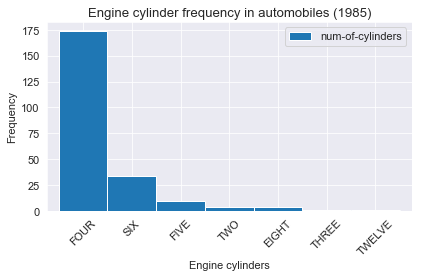

In [117]:
ax = auto_clean_df['num-of-cylinders'].value_counts().plot(kind='bar', width=1)
plt.title('Engine cylinder frequency in automobiles (1985)')
plt.ylabel('Frequency')
plt.xlabel('Engine cylinders')
plt.legend(loc='upper right')
sb.set_style('darkgrid')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig('Number_of_engine_cylinder_frequency.png')

(Pierson, 2017a: Vallisneri, 2018)

#### Catagorical

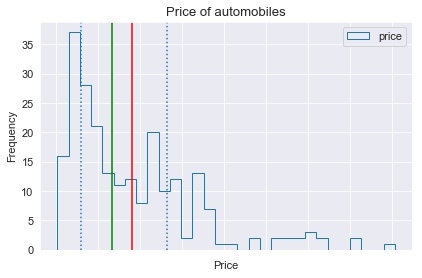

In [118]:
ax = auto_clean_df.price.plot(figsize=(6,4),kind='hist', histtype='step', bins=30)
plt.axvline(auto.price.mean(),c ='r')
plt.axvline(auto.price.median(), c ='g')
plt.axvline(auto.price.quantile(0.25), linestyle =':')
plt.axvline(auto.price.quantile(0.75),linestyle =':')
plt.title('Price of automobiles')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.legend(loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.savefig('Price_of_automobiles.png')

(Pierson, 2017a: Vallisneri, 2018)

### Bivariant analysis

In [119]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line

Null hypothesis :- In inferential statistics, the null hypothesis is a general statement or default position that there is no relationship between two measured phenomena, or no association among groups

https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot

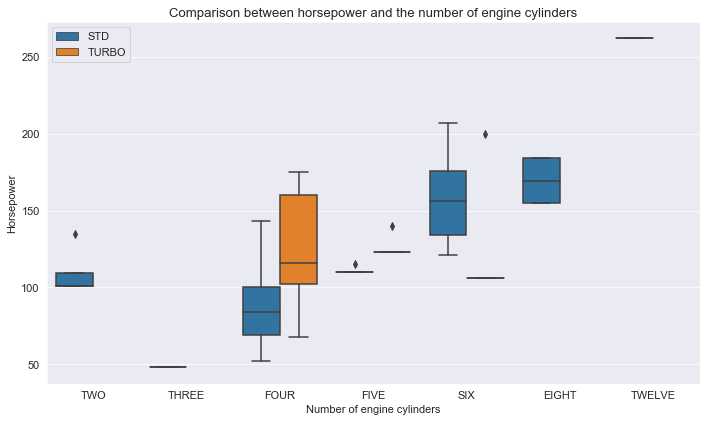

In [120]:
plt.rcParams['figure.figsize']=(10,6)
ax = sb.boxplot(x='num-of-cylinders', y='horsepower', data=auto_clean_df, hue="aspiration", 
                order=['TWO', 'THREE', 'FOUR', 'FIVE', 'SIX', 'EIGHT', 'TWELVE'])
plt.title('Comparison between horsepower and the number of engine cylinders')
plt.ylabel('Horsepower')
plt.xlabel('Number of engine cylinders')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('HorsepowerVrsCylinders.png')

(Pierson, 2017a; Seaborn 2018; The Python Gallery 2017b)

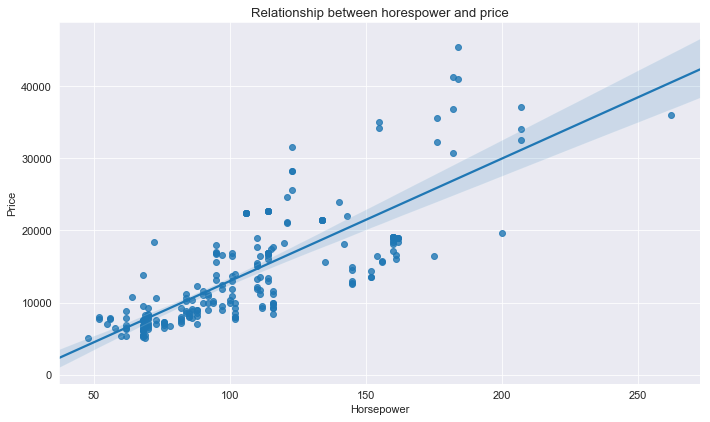

In [121]:
sb.regplot(x= auto['horsepower'], y= auto['price'])
#plt.legend(loc='best')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Relationship between horespower and price')
plt.tight_layout()
plt.savefig('HorsepowerVrsPrice.png')

(The Python Gallery, 2017a)

In [122]:
# # Pearson correlation coefficient: Parametric
# pearson_petal = stats.pearsonr(auto_clean_df['horsepower'], auto_clean_df['city-mpg'])
# print(pearson_petal,'\n')
# print('Pearson\'s correlation coefficient: ', pearson_petal[0])
# print('p-value: ', pearson_petal[1]) # p-value is not so useful or reliable

In [123]:
#auto['body-style'].value_counts()

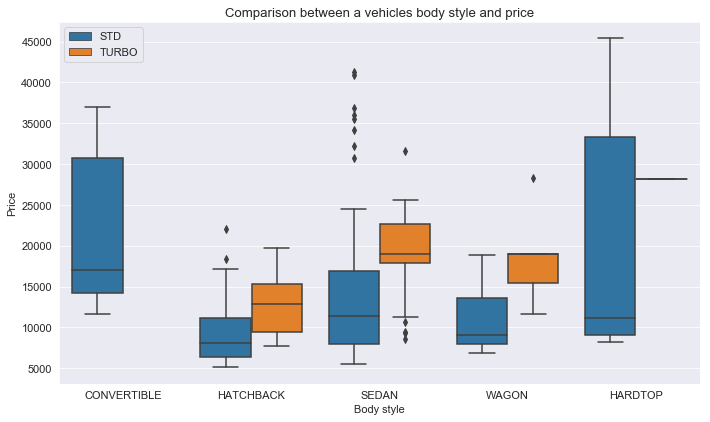

In [124]:
sb.boxplot(x='body-style', y='price', hue='aspiration', data=auto_clean_df)
plt.title('Comparison between a vehicles body style and price')
plt.ylabel('Price')
plt.xlabel('Body style')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('Body_style_vrs_price.png')

(Pierson, 2017a; Seaborn 2018)

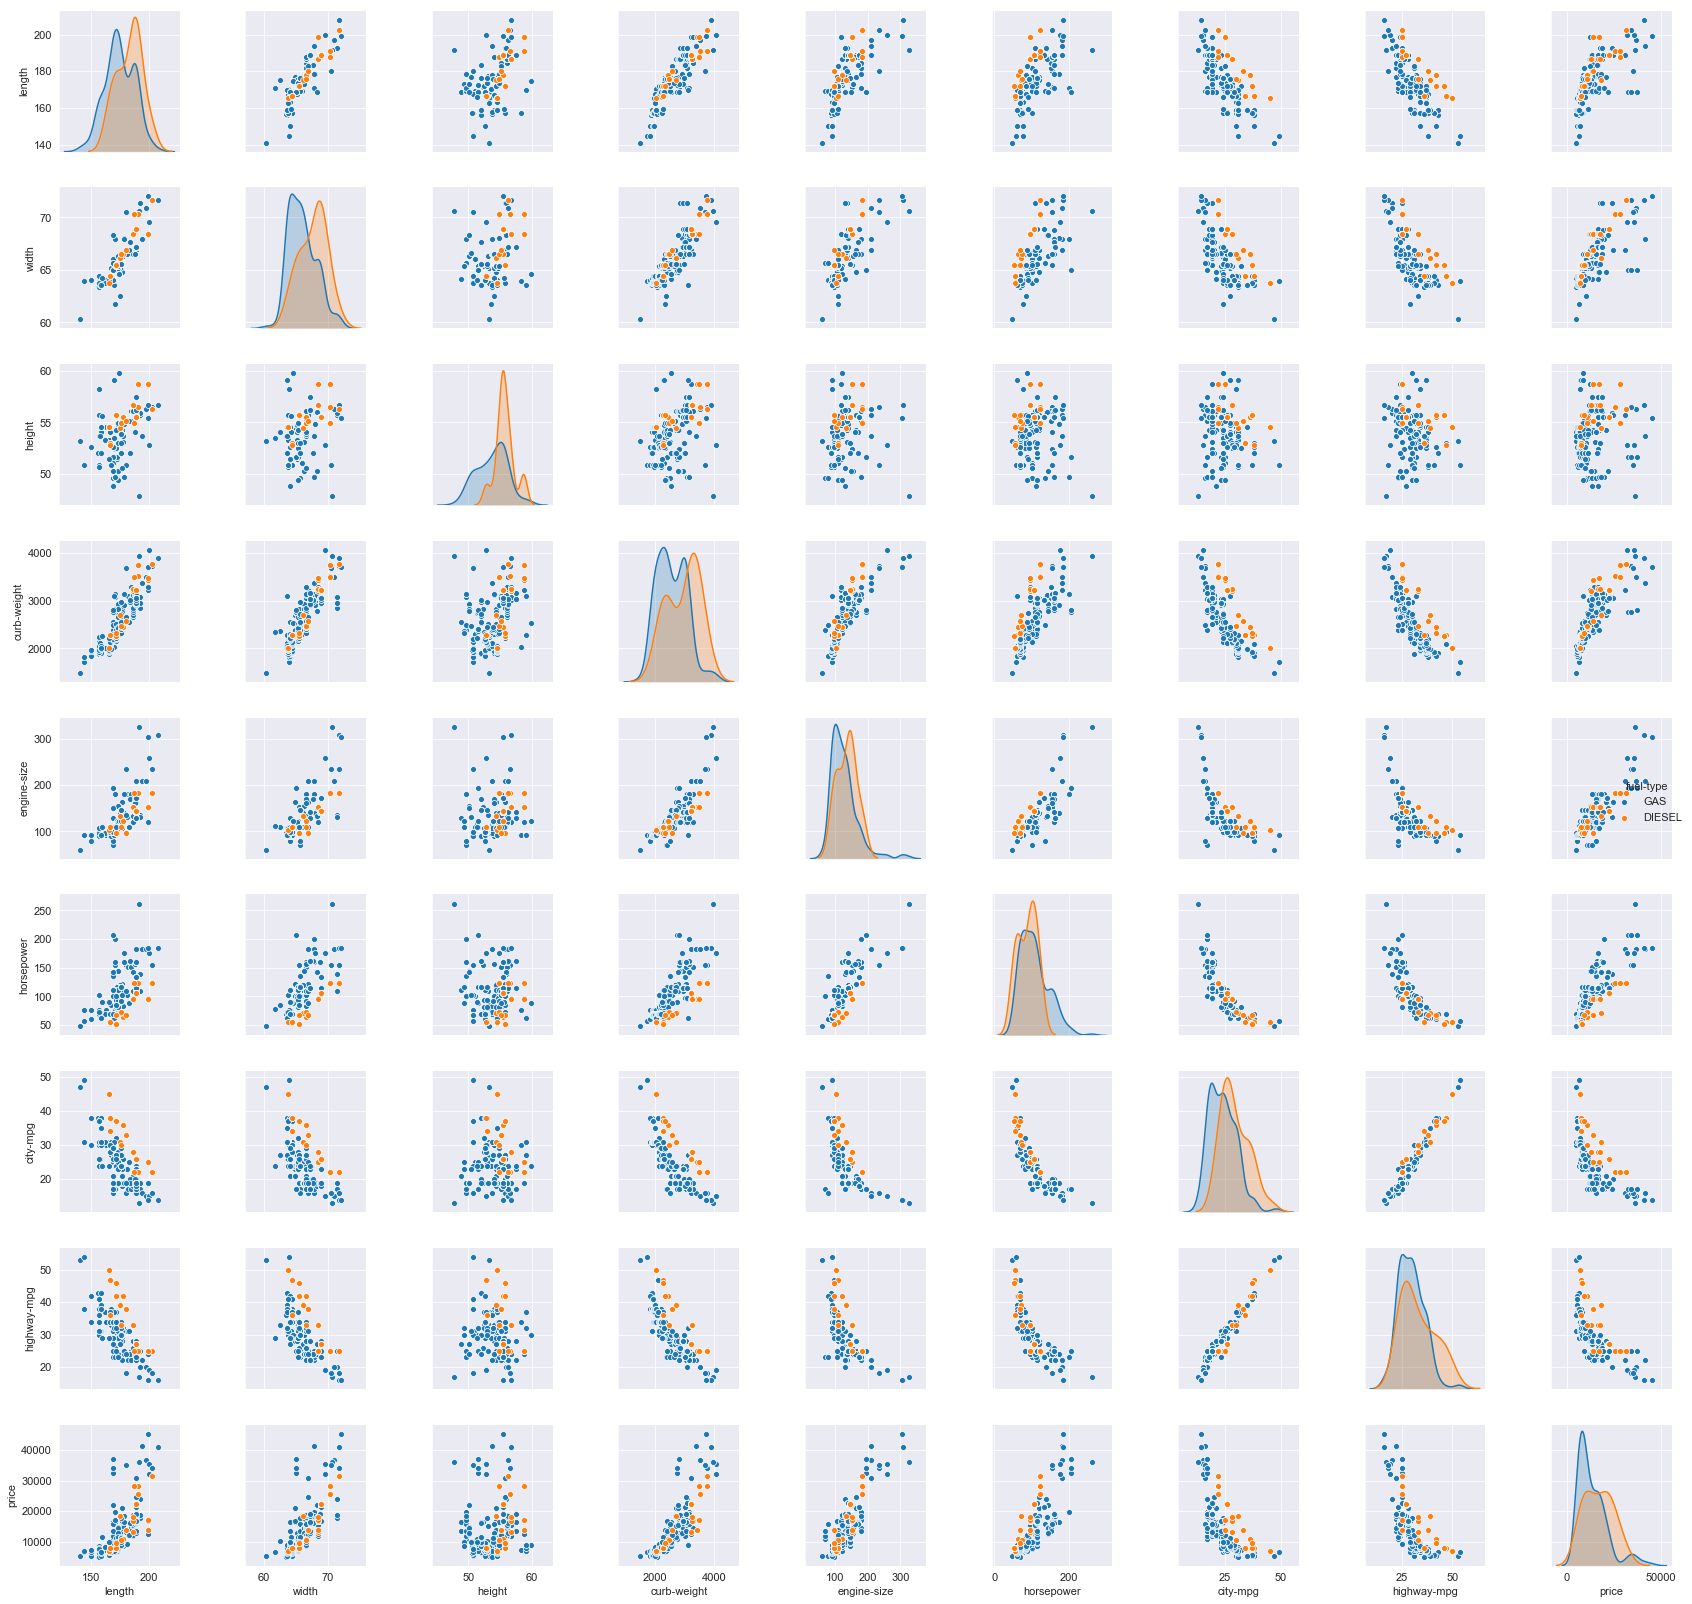

In [125]:
ax = sb.pairplot(auto_clean_df[['length', 'width', 'height',
       'curb-weight', 'engine-size', 'horsepower',
        'city-mpg', 'highway-mpg', 'price','fuel-type']], hue='fuel-type')
plt.rcParams.update({'font.size': 14})
plt.tight_layout()
plt.savefig('automobile_scatter_matrix.png')

(Seabon, n.db)

Reference list:

DataQuest, n.d., ‘Data Science Cheat Sheet – Pandas’, viewed 15 November 2019, <https://s3.amazonaws.com/dq-blog-files/pandas-cheat-sheet.pdf>.

Dua, D & Graff, C 2019 ‘UCI Machine Learning Repository’, Irvine, CA: University of California, School of Information and Computer Science, < http://archive.ics.uci.edu/ml>.

Haqqani M 2019, ‘Practical Data Science Web session class B Mohammad /recording’, video recording, COSC2791, RMIT University, viewed 12 November 2019, <https://au.bbcollab.com/collab/ui/session/playback/load/2972dc6d0f8445b8b065b743b40d6d72>.

McKinney, W 2012, Python for Data Analysis : Data Wrangling with Pandas, NumPy, and IPython, O'Reilly Publishing, EBSCO Host Central database.

Pandas pydata.org, 2019, ‘Pandas 0.25.3 documentation, User Guide, Working with missing data’, viewed 10 Novemeber 2019, <https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data>.

Patino G 2016, Doing frequent statistics with Scipy - PyData DC2016, YouTube, viewed 16 November 2019, <https://www.youtube.com/watch?v=UNp9Bavok0o>.

Pierson L, 2017a. Format Plots, LinkedIn Learn, viewed 16 Novelmber 2019, <https://www.linkedin.com/learning/python-for-data-science-essential-training/format-plots?u=2104756>.

Pierson L, 2017b. Create labels and annotation, LinkedIn Learn, viewed 16 November 2019 <https://www.linkedin.com/learning/python-for-data-science-essential-training/format-plots?u=2104756>.


Ren, Y, Jalalidil, T & Haqqani M 2019a, ‘Automobile.csv’, Assignment 1: Data Cleaning and Summarising, lecture notes, COSC2291, RMIT University, viewed 3 November 2019, <https://rmit.instructure.com/courses/62350/assignments/390947>.

Ren, Y, Jalalidil, T & Haqqani M 2019b, ‘1.3.1 Data source and type’, lecture notes, COSC2291, RMIT University, viewed 3 November 2019, <https://rmit.instructure.com/courses/62350/pages/1-dot-3-1-data-source-and-type?module_item_id=1929765>.

Schlimmer, J. C, 1985. Automobile Data Set, data file, UCI Machine Learning Repository, University of California, School of Information and Computer Science, viewed 1 November 2019, <https://archive.ics.uci.edu/ml/datasets/automobile>.

Seaborn n.d., Scatterplot Matrix, viewed 16 Novenber 2019, <https://seaborn.pydata.org/examples/scatterplot_matrix.html>.

Seaborn 2018, ‘Controlling figure aesthetics’, viewed 16 November 2019, <https://seaborn.pydata.org/tutorial/aesthetics.html>.

The Python Graph Gallery, 2017a, ‘Basic scatterplot \ Seaborn’, viewed 17 November 2019, <https://python-graph-gallery.com/35-control-order-of-boxplot/>.

The Python Graph Gallery, 2017b, ‘Control order of boxplot’, viewed 17 November 2019, <https://python-graph-gallery.com/35-control-order-of-boxplot/>.

The Python Graph Gallery, 2017a, ‘Basic scatterplot \ Seaborn’, viewed 17 November 2019, <https://python-graph-gallery.com/35-control-order-of-boxplot/>.

Van Basshuysen, R, Schaefer, F & Van Basshuysen, R 2016, Internal Combustion Engine Handbook - Basics Components System and Perspectives, 2nd edn, SEA International, Knovel Complete Central database.

Vallisneri M, 2018. The Power of visualisations, LinkedIn Learn, viewed 16 November 2019 <https://www.linkedin.com/learning/python-statistics-essential-training/the-power-of-visualization?u=2104756>.

Vo. T.H, Czygan, M, Kumar, A & Raman, K 2017 Python. Birmingham: Packt Publishing, ProQuest Ebook Central database.

